# Assignment 2 - ADS 1

## Climate Change - CO2 production vs. GDP (energy efficiency)

**Laveen Kirupakaran, 18049379**

---

### List of Countries

In [1]:
#list of country codes
country_codes = ['GBR','AUS','BRA','CHN','LKA','SDN','USA','SAU','IND','SGP']

#Dictionary containing Country Codes against the respective Country names
country_names = {'GBR' : 'United Kingdom','AUS' : 'Australia','BRA' : 'Brazil','CHN' : 'China', 'LKA' : 'Sri Lanka',
                 'SDN' : 'Sudan', 'USA' : 'United States of America', 'SAU' : 'Saudi Arabia', 'IND' : 'India', 
                 'SGP' : 'Singapore'}

# Dictionary object having Country codes as key and contients as values
country_group1 = {'GBR' : 'Europe','AUS': 'Australia','CHN': 'East Asia','BRA': 'South America','IND' : 'South Asia',
                  'LKA' : 'South Asia','SDN' : 'Africa','SGP' : 'Southeast Asia','SAU' : 'Middle East','USA' : 'North America'}

# Dictionary object having Country codes as key and Economic Devolopment as value
country_group2 = {'GBR' : 'High','AUS': 'High','CHN': 'High','BRA': 'Medium','IND' : 'Medium',
                  'LKA' : 'Low','SDN' : 'Low','SGP' : 'High','SAU' : 'High','USA' : 'High'}

# Dictionary object having Country codes as key and Population sizes as value
country_group3 = {'GBR' : 'Medium','AUS': 'Medium','CHN': 'Large','BRA': 'Medium','IND' : 'Large',
                  'LKA' : 'Medium','SDN' : 'Medium','SGP' : 'Small','SAU' : 'Small','USA' : 'Large'}

---

### List of Indicators 

In [2]:
#Indicators...
'''DF1|GDP Trend'''
#               : GDP per capita (current US$) - (NY.GDP.PCAP.CD)
#               : GDP per capita, PPP (current international $) - (NY.GDP.PCAP.PP.CD)
#               : Population, total - (SP.POP.TOTL)
#               : Energy use (kg of oil equivalent per capita) (EG.USE.PCAP.KG.OE)

'''DF2|CO2 Trend'''
#               : Total greenhouse gas emissions (thousand metric tons of CO2 equivalent excluding Land-Use Change and Forestry) (EN.ATM.GHGT.KT.CE)
#               : CO2 emissions (metric tons per capita) (EN.ATM.CO2E.PC)
#               : CO2 emissions from electricity and heat production, total (% of total fuel combustion) (EN.CO2.ETOT.ZS)
#               : CO2 emissions from manufacturing industries and construction (% of total fuel combustion) (EN.CO2.MANF.ZS)

indic_id_1 = ['NY.GDP.PCAP.CD','NY.GDP.PCAP.PP.CD','SP.POP.TOTL','EG.USE.PCAP.KG.OE']
print("GDP and Population Indicators==>>",indic_id_1)

indic_id_2 = ['EN.ATM.GHGT.KT.CE', 'EN.ATM.CO2E.PC', 'EN.CO2.ETOT.ZS', 'EN.CO2.MANF.ZS']
print("\nCO2 Emissions and Energy Indicators==>>", indic_id_2)




GDP and Population Indicators==>> ['NY.GDP.PCAP.CD', 'NY.GDP.PCAP.PP.CD', 'SP.POP.TOTL', 'EG.USE.PCAP.KG.OE']

CO2 Emissions and Energy Indicators==>> ['EN.ATM.GHGT.KT.CE', 'EN.ATM.CO2E.PC', 'EN.CO2.ETOT.ZS', 'EN.CO2.MANF.ZS']


---

### Data Frame

In [3]:
import wbgapi as wbd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import wb

In [4]:
# Analyzing the CO2 emissions for tge countries during the years between 2009 to 2014
year = ['2009','2010','2011','2012','2013','2014']
year

['2009', '2010', '2011', '2012', '2013', '2014']

In [5]:
# By using panda_datareader downloading the data from World bank Data
df_1 = wb.download(indicator = indic_id_1, country = country_codes, start=2009, end = 2014)
df_2 = wb.download(indicator = indic_id_2, country = country_codes, start=2009, end = 2014)
df_1.head()

NY.GDP.PCAP.CD  NY.GDP.PCAP.PP.CD  SP.POP.TOTL  \
country   year                                                   
Australia 2014    62511.690590       46880.895180     23475686   
          2013    68156.627916       45906.440040     23128129   
          2012    68027.841707       42836.671864     22733465   
          2011    62574.145703       42003.158056     22340024   
          2010    52087.972289       39336.663485     22031750   

                EG.USE.PCAP.KG.OE  
country   year                     
Australia 2014        5334.681679  
          2013        5468.391369  
          2012        5575.287093  
          2011        5745.232190  
          2010        5793.116026

In [6]:
ind = pd.MultiIndex.from_product([country_codes,year])
ind

MultiIndex([('GBR', '2009'),
            ('GBR', '2010'),
            ('GBR', '2011'),
            ('GBR', '2012'),
            ('GBR', '2013'),
            ('GBR', '2014'),
            ('AUS', '2009'),
            ('AUS', '2010'),
            ('AUS', '2011'),
            ('AUS', '2012'),
            ('AUS', '2013'),
            ('AUS', '2014'),
            ('BRA', '2009'),
            ('BRA', '2010'),
            ('BRA', '2011'),
            ('BRA', '2012'),
            ('BRA', '2013'),
            ('BRA', '2014'),
            ('CHN', '2009'),
            ('CHN', '2010'),
            ('CHN', '2011'),
            ('CHN', '2012'),
            ('CHN', '2013'),
            ('CHN', '2014'),
            ('LKA', '2009'),
            ('LKA', '2010'),
            ('LKA', '2011'),
            ('LKA', '2012'),
            ('LKA', '2013'),
            ('LKA', '2014'),
            ('SDN', '2009'),
            ('SDN', '2010'),
            ('SDN', '2011'),
            ('SDN', '2012'),
            ('

In [7]:
# Creating Multi index dataframe columns to show the above structure with the help of from_product()

index1 = pd.MultiIndex.from_product([country_codes, year],
                                   names=['Country', 'Year'])
'''DF1|GDP Trend'''

column1 = ['GDP/cap','GDP/cap|(ppp)','Popul|Total','GGE|Total']

'''DF2|CO2 Trend'''

column_1 = ['Total|Energy']
column_2 = pd.MultiIndex.from_product([['CO2 Emissions'], ['Total','Electricity& Heat','Manufac & Contsr']])

column_1
column_2

MultiIndex([('CO2 Emissions',             'Total'),
            ('CO2 Emissions', 'Electricity& Heat'),
            ('CO2 Emissions',  'Manufac & Contsr')],
           )

In [8]:
# Converting DFs to list
l1 = df_1[:][:].to_numpy().tolist()
l2 = df_2[:][:].to_numpy().tolist()
dfl = pd.DataFrame(l2)
dfl = dfl.drop(columns = 0)
l = dfl[:][:].to_numpy().tolist()

In [9]:
# Converting non-finite values to Integers...
my_df1 = df_1.fillna(df_1.mean()) # Filling the NAN values with mean values
my_df1 = my_df1.round(2) # Rounding off decimals to 2
my_df1.head()

NY.GDP.PCAP.CD  NY.GDP.PCAP.PP.CD  SP.POP.TOTL  \
country   year                                                   
Australia 2014        62511.69           46880.90     23475686   
          2013        68156.63           45906.44     23128129   
          2012        68027.84           42836.67     22733465   
          2011        62574.15           42003.16     22340024   
          2010        52087.97           39336.66     22031750   

                EG.USE.PCAP.KG.OE  
country   year                     
Australia 2014            5334.68  
          2013            5468.39  
          2012            5575.29  
          2011            5745.23  
          2010            5793.12

In [10]:
gdp_trend_df = pd.DataFrame(l1, index = index1, columns= indic_id_1 )
gdp_trend_df.head()

NY.GDP.PCAP.CD  NY.GDP.PCAP.PP.CD  SP.POP.TOTL  \
Country Year                                                   
GBR     2009    62511.690590       46880.895180   23475686.0   
        2010    68156.627916       45906.440040   23128129.0   
        2011    68027.841707       42836.671864   22733465.0   
        2012    62574.145703       42003.158056   22340024.0   
        2013    52087.972289       39336.663485   22031750.0   

              EG.USE.PCAP.KG.OE  
Country Year                     
GBR     2009        5334.681679  
        2010        5468.391369  
        2011        5575.287093  
        2012        5745.232190  
        2013        5793.116026

In [11]:
# GDP/cap       : GDP per capita (current US$)
# GDP/cap (ppp) : GDP per capita, PPP (current international $)
# Popul|Total   : Population, total
# Energy Use    : Energy use (kg of oil equivalent per capita) 

gdp_trend_df = pd.DataFrame(l1, index = index1, columns=['GDP/cap','GDP/cap|(ppp)','Popul|Total','Energy|Total'])
gdp_trend_df.head(18)

GDP/cap  GDP/cap|(ppp)   Popul|Total  Energy|Total
Country Year                                                         
GBR     2009  62511.690590   46880.895180  2.347569e+07   5334.681679
        2010  68156.627916   45906.440040  2.312813e+07   5468.391369
        2011  68027.841707   42836.671864  2.273346e+07   5575.287093
        2012  62574.145703   42003.158056  2.234002e+07   5745.232190
        2013  52087.972289   39336.663485  2.203175e+07   5793.116026
        2014  42783.322565   40281.799672  2.169170e+07   5862.551944
AUS     2009  12112.834955   15718.564950  2.027637e+08   1495.541141
        2010  12300.386712   15588.726129  2.010359e+08   1461.076774
        2011  12370.223255   15046.290182  1.992873e+08   1413.733385
        2012  13245.387370   15040.061086  1.975145e+08   1367.188049
        2013  11286.071540   14299.555138  1.957136e+08   1358.502402
        2014   8597.794335   13269.122107  1.938865e+08   1240.177304
BRA     2009   7636.116601   12480.338530  1.371860e+09   2224.354898
        2010   7020.338485   11872.497381  1.363240e+09   2204.243299
        2011   6300.615118   11168.697298  1.354190e+09   2149.602569
        2012   5614.352135   10292.940478  1.345035e+09   2085.083022
        2013   4550.453108    9253.765188  1.337705e+09   1954.722556
        2014   3832.236432    8307.849519  1.331260e+09   1778.433519

In [12]:
energy_trend_df = gdp_trend_df.drop(columns = 'Popul|Total')
energy_trend_df

GDP/cap  GDP/cap|(ppp)  Energy|Total
Country Year                                           
GBR     2009  62511.690590   46880.895180   5334.681679
        2010  68156.627916   45906.440040   5468.391369
        2011  68027.841707   42836.671864   5575.287093
        2012  62574.145703   42003.158056   5745.232190
        2013  52087.972289   39336.663485   5793.116026
        2014  42783.322565   40281.799672   5862.551944
AUS     2009  12112.834955   15718.564950   1495.541141
        2010  12300.386712   15588.726129   1461.076774
        2011  12370.223255   15046.290182   1413.733385
        2012  13245.387370   15040.061086   1367.188049
        2013  11286.071540   14299.555138   1358.502402
        2014   8597.794335   13269.122107   1240.177304
BRA     2009   7636.116601   12480.338530   2224.354898
        2010   7020.338485   11872.497381   2204.243299
        2011   6300.615118   11168.697298   2149.602569
        2012   5614.352135   10292.940478   2085.083022
        2013   4550.453108    9253.765188   1954.722556
        2014   3832.236432    8307.849519   1778.433519
CHN     2009  47787.241298   41580.602488   2777.310987
        2010  43713.814124   40218.747256   2987.700589
        2011  42686.800052   38514.026169   3042.859871
        2012  42284.884490   37379.290966   2972.153065
        2013  39688.614968   36576.586540   3230.615984
        2014  38952.211026   35212.420477   3145.585662
LKA     2009   1573.885642    5233.882343    636.571834
        2010   1449.610451    5057.233414    605.794038
        2011   1443.882435    4861.156152    599.155620
        2012   1458.104066    4493.669466    577.994426
        2013   1357.563727    4236.744348    561.653406
        2014   1101.960838    3912.418211    544.626597
SDN     2009   3819.253530   11256.856050    515.511021
        2010   3610.289363   10852.064042    487.378431
        2011   3350.521876   10315.180247    551.020710
        2012   3200.861132    9007.734199    512.678484
        2013   2799.648738    8194.269254    480.771837
        2014   2090.401826    7550.294887    449.526544
USA     2009  24464.212557   55726.102312   6905.843440
        2010  24845.124664   55908.249927   6394.941937
        2011  25243.601998   57364.985113   6871.871170
        2012  23745.880578   56133.144188   6301.293308
        2013  19262.547601   51529.827889   6764.374759
        2014  16113.143710   49933.193650   6257.648402
SAU     2009   1303.838955    4427.448590    394.639669
        2010   1160.535552    3838.360051    394.606226
        2011   1039.762051    3805.895640    395.658939
        2012   1366.410905    4216.373408    471.216313
        2013   1338.443724    3900.268868    483.692118
        2014   1202.557881    3809.611746    484.065001
IND     2009  57562.530794   84423.191343   5121.804318
        2010  56967.425794   83001.787801   4880.406070
        2011  55546.488539   82064.961191   4898.330465
        2012  53890.428727   80052.391498   5069.171794
        2013  47236.960235   75294.356554   5006.620992
        2014  38927.206882   66149.004645   4257.776277
SGP     2009  55049.988327   55049.988327   6960.683997
        2010  53106.536767   53106.536767   6905.598633
        2011  51602.931046   51602.931046   6872.027284
        2012  49882.558132   49882.558132   7029.954601
        2013  48466.657603   48466.657603   7161.426552
        2014  47099.980471   47099.980471   7056.783653

### Plotting Graphs

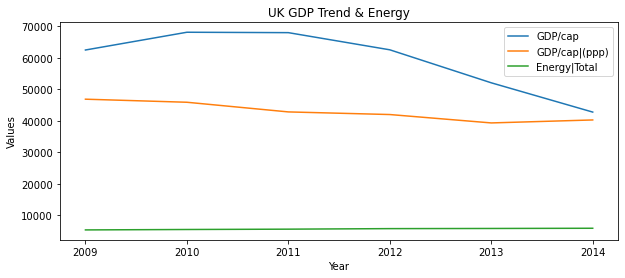

In [13]:
# Ploting line graph
energy_trend_df.loc
UK_energy_df = energy_trend_df.loc['GBR']
UK_energy_df.plot.line(title ="UK GDP Trend & Energy",subplots= False, figsize=(10,4));
plt.ylabel('Values')
plt.legend(loc="best")
plt.show(block=True);

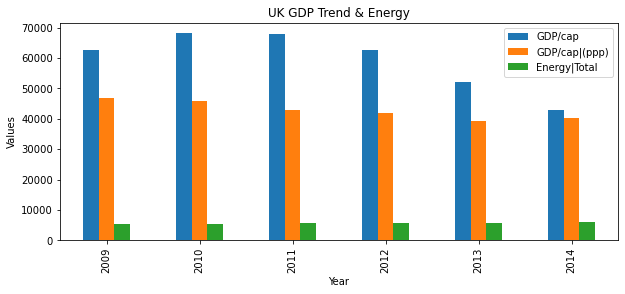

In [14]:
energy_trend_df.loc
UK_energy_df = energy_trend_df.loc['GBR']
UK_energy_df.plot.bar(title ="UK GDP Trend & Energy",subplots= False, figsize=(10,4));
plt.ylabel('Values')
plt.legend(loc="best")
plt.show(block=True);

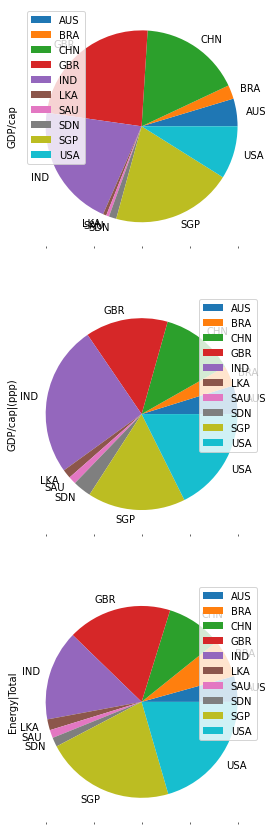

<Figure size 432x288 with 0 Axes>

In [15]:
#Plotting the CO2 trend data frame in a pie plot
tot_gdp_trend_anal = energy_trend_df.groupby(['Country']).sum()
tot_gdp_trend_anal.plot(kind='pie', subplots= True, figsize=(15,15), layout=(3,1))
plt.show()
plt.tight_layout()

In [16]:
# Converting non-finite values to Integers...
my_df2 = df_2.fillna(df_2.mean()) # Filling the NAN values with mean values
my_df2 = my_df2.round(2) # Rounding off decimals to 2
my_df2.head(12)

EN.ATM.GHGT.KT.CE  EN.ATM.CO2E.PC  EN.CO2.ETOT.ZS  \
country   year                                                      
Australia 2014             593500           15.76           58.36   
          2013             581890           16.40           59.38   
          2012             670930           16.97           60.90   
          2011             673130           17.27           61.55   
          2010             571220           17.58           62.92   
          2009             601070           18.21           63.32   
Brazil    2014            1105900            2.50           26.31   
          2013            1070850            2.40           23.48   
          2012            1042040            2.27           19.36   
          2011            1004840            2.11           16.16   
          2010             986440            2.03           18.65   
          2009             905490            1.81           17.69   

                EN.CO2.MANF.ZS  
country   year                  
Australia 2014           11.49  
          2013           11.40  
          2012           10.62  
          2011           10.23  
          2010            9.77  
          2009           10.54  
Brazil    2014           20.60  
          2013           21.84  
          2012           23.97  
          2011           26.99  
          2010           25.84  
          2009           25.15

In [17]:
# CO2 emi|Total       : CO2 emissions (metric tons per capita) 
# CO2 emi|Elec&Heat   : CO2 emissions from electricity and heat production, total (% of total fuel combustion) 
# CO2 emi|Manu&Cnstr  : CO2 emissions from manufacturing industries and construction (% of total fuel combustion)
# GGE|Total           : Total greenhouse gas emissions 

co2_trend_df = pd.DataFrame(l, index = index1, columns= column_2)

df2_reset = df_2.reset_index()
co2_trend_df[('Green|Gas|Emissions','Total')] = list(df2_reset['EN.ATM.GHGT.KT.CE']/10000)
co2_trend_df.head(18)

CO2 Emissions                                     \
                     Total Electricity& Heat Manufac & Contsr   
Country Year                                                    
GBR     2009     15.755876         58.357858        11.488041   
        2010     16.398646         59.378263        11.395907   
        2011     16.969257         60.903149        10.622853   
        2012     17.268110         61.551368        10.227155   
        2013     17.581445         62.922935         9.765364   
        2014     18.207425         63.317509        10.542397   
AUS     2009      2.499362         26.309819        20.602076   
        2010      2.401860         23.481710        21.835464   
        2011      2.266878         19.363395        23.965044   
        2012      2.111845         16.163146        26.987346   
        2013      2.032204         18.654360        25.841362   
        2014      1.809461         17.686047        25.146433   
BRA     2009      7.212791         52.253009        31.715227   
        2010      7.289017         53.156463        31.072303   
        2011      7.039788         52.526804        32.053006   
        2012      6.898148         52.390904        32.957118   
        2013      6.332166         51.568239        33.448077   
        2014      5.795344         50.365987        34.343978   

             Green|Gas|Emissions  
                           Total  
Country Year                      
GBR     2009              59.350  
        2010              58.189  
        2011              67.093  
        2012              67.313  
        2013              57.122  
        2014              60.107  
AUS     2009             110.590  
        2010             107.085  
        2011             104.204  
        2012             100.484  
        2013              98.644  
        2014              90.549  
BRA     2009            1186.531  
        2010            1185.453  
        2011            1139.983  
        2012            1107.455  
        2013            1020.382  
        2014             937.766

In [18]:
co2_trend_df.dropna().describe()

CO2 Emissions                                    Green|Gas|Emissions
              Total Electricity& Heat Manufac & Contsr               Total
count     60.000000         60.000000        60.000000           60.000000
mean       7.674581         43.621259        18.074996          228.065667
std        6.476302         14.872503         8.779662          344.560453
min        0.391125         11.022044         5.913978            2.435000
25%        1.482945         35.492764         8.907928            9.860250
50%        7.052345         48.041678        20.421278           58.965500
75%       15.832794         52.684219        25.156034          270.690000
max       18.207425         63.317509        34.343978         1186.531000

In [19]:
co2_gbr_list = list(co2_trend_df.head(6).iloc[:,1])
co2_gbr_list

[58.3578575632725,
 59.3782626853205,
 60.9031491384433,
 61.5513680949923,
 62.9229347435437,
 63.3175092167062]

In [20]:
#plot = co2_gbr_list.plot.pie(y='TOTAL', figsize=(6, 6),)
#plt.show()

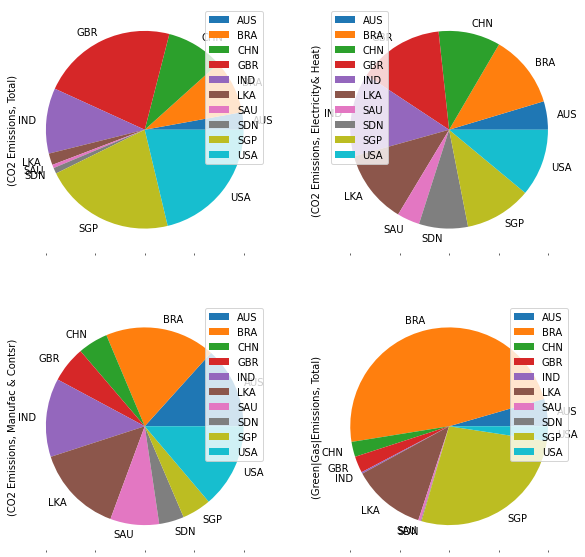

<Figure size 432x288 with 0 Axes>

In [21]:
#Plotting the CO2 trend data frame in a pie plot
tot_co2_emiss = co2_trend_df.groupby(['Country']).sum()
tot_co2_emiss.plot(kind='pie', subplots= True, figsize=(10,10), layout=(2,2))
plt.show()
plt.tight_layout()

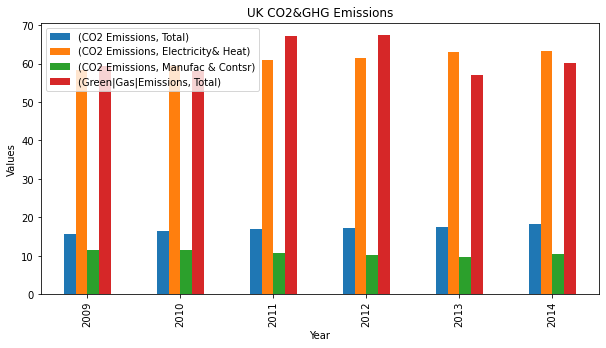

In [22]:
UK_co2_emission_df = co2_trend_df.loc['GBR']
UK_co2_emission_df.plot.bar(title ="UK CO2&GHG Emissions",subplots= False, figsize=(10,5));
plt.ylabel('Values')
plt.legend(loc="best")
plt.show(block=True);

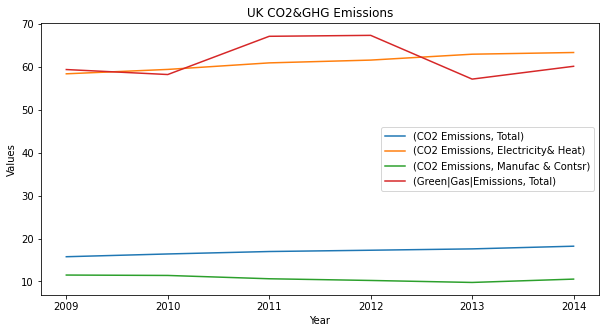

In [23]:
UK_co2_emission_df = co2_trend_df.loc['GBR']
UK_co2_emission_df.plot.line(title ="UK CO2&GHG Emissions",subplots= False, figsize=(10,5));
plt.ylabel('Values')
plt.legend(loc="best")
plt.show(block=True);

---